# Observed Occupations-Task Dataset

By Paul Duckworth 11th Dec 2017.

- Read in the Observed Occupation and Task dataset (from Matt Willis). 

- Assign Probability of Automation scores based on a weighted average of DWA ID mappings. 

- Insert additional rows using the "also done by column.

- output a final dataset. 

## Observational Data:

In [1]:
# encoding=utf8
import os
import numpy as np
import pandas as pd
import getpass
import pickle
import string
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Input DATAset of observed Occupations and Tasks
datasets = '/home/'+ getpass.getuser() +'/Datasets/'
load_data = os.path.join(datasets, 'FoHealthcare/Final_dataset_27082018.xlsx')

# Output DATAset of observed Occupations and Tasks (plus automation information)
xls_out_path = os.path.join(datasets, 'FoHealthcare/Final_dataset_06112018.xlsx')

data = pd.ExcelFile(load_data).parse(sheet_name="Tasks")
print(data.shape)
data.rename(columns = {'Occupation title':'Observed Occupation'}, inplace = True)

# # Strip whitespaces and Capitalize Occupations
data["Observed Occupation"] = pd.Series([string.capwords(i.strip()) for i in data["Observed Occupation"]])
data["Task"] = data["Task"].str.strip()
unique_occupations = [string.capwords(i.strip()) for i in data["Observed Occupation"].unique()]+["Scanning Clerk"]

# change this to a flag:
try:
    equiv = {"Clinical":1, "Clerical":0}
    data["clinical"] = data["Clinical or Clerical Task"].map(equiv)
except:
    pass

# If the Task dataset already has all these variables, just remove them... and compute them again :S 
try: 
    #"Clinical or Clerical Task"  - replaced by "clerical" flag
    data = data.drop(columns=["Task Weight", "Automation Scores", "Weighted Average Automation Score"])
except:
    pass
data.head()

(137, 23)


,Observed Occupation,Task,Task keywords/context,GP Code,DWA Task,DWA ID,Notes,Task also done by,Technology Use,Technology use3,Technology use4,Information work,Information work5,Information work6,Information work7,partial automation,Future automation potential (FAP),FAP Notes,clinical,structured_work
0,Administrator,Medical Coding of letters and other documents,Structured clinical vocabulary highlight docum...,"BFS, BSC, WMC",Code data or other information.; Convert data ...,4.A.3.b.1.I06.D08; 4.A.3.b.1.I06.D11; 4.A.3.b....,NaN,Summariser; deputy practice manager; Administr...,Desktop,specific software,NaN,reduction,NaN,NaN,NaN,no,NaN,NaN,0,1
1,Administrator,Register new Patients,NaN,"BFS, BSC",Process healthcare paperwork.; Verify accuracy...,4.A.4.c.1.I01.D03; 4.A.2.a.2.I05.D04; 4.A.3.b....,Summarise patient records that have just moved...,Receptionist; Summariser,Desktop,paper,NaN,transfer,entry,structured,error checking,no,NaN,NaN,0,1
2,Administrator,Use software to convert printed letters into t...,NaN,BFS,Convert data among multiple digital or analog ...,4.A.3.b.1.I06.D11; 4.A.2.a.3.I01.D02,Uses optical character recognition,NaN,Desktop,software,NaN,reduction,NaN,NaN,NaN,yes,NaN,NaN,0,0
3,Administrator,Work in Open Exeter online web portal,NaN,WMC,Monitor external affairs or events affecting b...,4.A.1.a.2.I08.D03; 4.A.4.c.1.I01.D03; 4.A.3.b....,NaN,Practice Manager; Deputy Practice Manager; Adm...,Desktop,website,NaN,transfer,NaN,NaN,NaN,yes,NaN,NaN,0,0
4,Administrator,"Write letters for secondary care, other GPs, o...",NaN,MWMC,Type documents.; Edit written materials.; Read...,4.A.4.c.1.I01.D07; 4.A.2.b.1.I07.D01; 4.A.1.a....,"Letters written as needed, changes day to day ...",Receptionist; Secretary; General Practitioner,Desktop,software,NaN,transfer,bricolage,NaN,NaN,yes,NaN,NaN,0,0


## Add Structured Work Flag

In [2]:
structured_work = []

for i, row in data.iterrows():
    structured_flat = 0

    for ind, col in enumerate(data.columns):
        if isinstance(row[ind], str): 
            if "structured" in row[ind].lower():
                structured_flat = 1
            if "unstructured" in row[ind].lower():
                structured_flat = -1

        else: 
            pass #print(col, row[ind])
    
    structured_work.append(structured_flat)

print(structured_work[:10])

data["structured_work"] = pd.Series(structured_work)
data.head()

[1, 1, 0, 0, 0, 0, 0, 0, 1, -1]


,Observed Occupation,Task,Task keywords/context,GP Code,DWA Task,DWA ID,Notes,Task also done by,Technology Use,Technology use3,Technology use4,Information work,Information work5,Information work6,Information work7,partial automation,Future automation potential (FAP),FAP Notes,clinical,structured_work
0,Administrator,Medical Coding of letters and other documents,Structured clinical vocabulary highlight docum...,"BFS, BSC, WMC",Code data or other information.; Convert data ...,4.A.3.b.1.I06.D08; 4.A.3.b.1.I06.D11; 4.A.3.b....,NaN,Summariser; deputy practice manager; Administr...,Desktop,specific software,NaN,reduction,NaN,NaN,NaN,no,NaN,NaN,0,1
1,Administrator,Register new Patients,NaN,"BFS, BSC",Process healthcare paperwork.; Verify accuracy...,4.A.4.c.1.I01.D03; 4.A.2.a.2.I05.D04; 4.A.3.b....,Summarise patient records that have just moved...,Receptionist; Summariser,Desktop,paper,NaN,transfer,entry,structured,error checking,no,NaN,NaN,0,1
2,Administrator,Use software to convert printed letters into t...,NaN,BFS,Convert data among multiple digital or analog ...,4.A.3.b.1.I06.D11; 4.A.2.a.3.I01.D02,Uses optical character recognition,NaN,Desktop,software,NaN,reduction,NaN,NaN,NaN,yes,NaN,NaN,0,0
3,Administrator,Work in Open Exeter online web portal,NaN,WMC,Monitor external affairs or events affecting b...,4.A.1.a.2.I08.D03; 4.A.4.c.1.I01.D03; 4.A.3.b....,NaN,Practice Manager; Deputy Practice Manager; Adm...,Desktop,website,NaN,transfer,NaN,NaN,NaN,yes,NaN,NaN,0,0
4,Administrator,"Write letters for secondary care, other GPs, o...",NaN,MWMC,Type documents.; Edit written materials.; Read...,4.A.4.c.1.I01.D07; 4.A.2.b.1.I07.D01; 4.A.1.a....,"Letters written as needed, changes day to day ...",Receptionist; Secretary; General Practitioner,Desktop,software,NaN,transfer,bricolage,NaN,NaN,yes,NaN,NaN,0,0


## Get Automation Labels:

In [3]:
automation_scores = pd.read_csv("aies_data/full_y_with_uncertainty.csv")
print(automation_scores.shape)
automation_scores.head()

automation_scores[automation_scores["DWA ID"] == "4.A.4.c.1.I03.D06"]

(2067, 3)


,DWA ID,y_pred,uncertainty
301,4.A.4.c.1.I03.D06,2.553322,0.581441


In [4]:
DWArefs = pd.read_table(os.path.join(datasets, 'ONET/databases/db2016/DWA Reference.txt'), sep='\t')
automation_scores = automation_scores.merge(DWArefs[['DWA ID', 'DWA Title']], on=['DWA ID'])
print(automation_scores.shape)
automation_scores.head()

(2067, 4)


,DWA ID,y_pred,uncertainty,DWA Title
0,4.A.1.a.1.I01.D01,2.343229,0.668393,Review art or design materials.
1,4.A.1.a.1.I01.D04,1.647306,0.612291,Study scripts to determine project requirements.
2,4.A.1.a.1.I02.D08,3.141396,0.619428,Review technical documents to plan work.
3,4.A.1.a.1.I02.D09,2.813320,0.581371,Review blueprints or specifications to determi...
4,4.A.1.a.1.I02.D10,3.082338,0.591766,Review work orders or schedules to determine o...


## Add Task Weights and DWA Scores:

In [5]:
data["Task Weight"] =  data.apply(lambda _: '', axis=1)
data["Automation Scores"] =  data.apply(lambda _: '', axis=1)
data["Weighted Average Automation Score"] =  data.apply(lambda _: '', axis=1)

for i, (occ, task, str_dwas) in data[["Observed Occupation", "Task", "DWA ID"]].iterrows():
    
    # # Compute the weight (based on number of DWAs selected to Match)  
    dwas = str_dwas.split(";")
    weight = 1./len(dwas)

    # # Grab the Automation Scores per DWA ID
    str_auto_scores = ""
    flo_auto_scores = []
    str_weights = ""
    for d in dwas:
#         try:
    
        float_y = automation_scores[automation_scores["DWA ID"] == d.strip()]["y_pred"].values[0]
        y = " %0.2f;" % float_y
#         except:
#             print("No Y value found: ", d)
#             float_y = 0
#             y = ""
            
        # # Average the Automation scores to compute the Observed Task's Automation Score
        flo_auto_scores.append(float_y)
        str_auto_scores += y
        str_weights += " %0.2f;" % weight
        
    data.at[i, "Task Weight"] = str_weights
    data.at[i,"Automation Scores"] = str_auto_scores
    data.at[i,"Weighted Average Automation Score"] = np.mean(flo_auto_scores)
print(data.shape)
data.head()

(137, 23)


,Observed Occupation,Task,Task keywords/context,GP Code,DWA Task,DWA ID,Notes,Task also done by,Technology Use,Technology use3,...,Information work6,Information work7,partial automation,Future automation potential (FAP),FAP Notes,clinical,structured_work,Task Weight,Automation Scores,Weighted Average Automation Score
0,Administrator,Medical Coding of letters and other documents,Structured clinical vocabulary highlight docum...,"BFS, BSC, WMC",Code data or other information.; Convert data ...,4.A.3.b.1.I06.D08; 4.A.3.b.1.I06.D11; 4.A.3.b....,NaN,Summariser; deputy practice manager; Administr...,Desktop,specific software,...,NaN,NaN,no,NaN,NaN,0,1,0.25; 0.25; 0.25; 0.25;,3.15; 3.05; 3.68; 3.00;,3.22045
1,Administrator,Register new Patients,NaN,"BFS, BSC",Process healthcare paperwork.; Verify accuracy...,4.A.4.c.1.I01.D03; 4.A.2.a.2.I05.D04; 4.A.3.b....,Summarise patient records that have just moved...,Receptionist; Summariser,Desktop,paper,...,structured,error checking,no,NaN,NaN,0,1,0.33; 0.33; 0.33;,2.78; 3.24; 3.68;,3.2349
2,Administrator,Use software to convert printed letters into t...,NaN,BFS,Convert data among multiple digital or analog ...,4.A.3.b.1.I06.D11; 4.A.2.a.3.I01.D02,Uses optical character recognition,NaN,Desktop,software,...,NaN,NaN,yes,NaN,NaN,0,0,0.50; 0.50;,3.05; 3.00;,3.02677
3,Administrator,Work in Open Exeter online web portal,NaN,WMC,Monitor external affairs or events affecting b...,4.A.1.a.2.I08.D03; 4.A.4.c.1.I01.D03; 4.A.3.b....,NaN,Practice Manager; Deputy Practice Manager; Adm...,Desktop,website,...,NaN,NaN,yes,NaN,NaN,0,0,0.33; 0.33; 0.33;,2.00; 2.78; 2.78;,2.51947
4,Administrator,"Write letters for secondary care, other GPs, o...",NaN,MWMC,Type documents.; Edit written materials.; Read...,4.A.4.c.1.I01.D07; 4.A.2.b.1.I07.D01; 4.A.1.a....,"Letters written as needed, changes day to day ...",Receptionist; Secretary; General Practitioner,Desktop,software,...,NaN,NaN,yes,NaN,NaN,0,0,0.20; 0.20; 0.20; 0.20; 0.20;,3.60; 2.23; 3.28; 3.39; 2.42;,2.98306


In [6]:
m = data["Weighted Average Automation Score"].mean()
s = data["Weighted Average Automation Score"].std()
print("Average Automation of Tasks, %0.3f, (%0.3f)" % (m, s))

Average Automation of Tasks, 2.847, (0.407)


## Also Done By: add extra rows

In [7]:
unique_occupations

['Administrator',
 'Deputy Practice Manager',
 'General Practitioner',
 'Healthcare Assistant',
 'Nurse Practitioner',
 'Pharmacy Technician',
 'Phlebotomist',
 'Practice Manager',
 'Practice Nurse',
 'Practice Pharmacist',
 'Prescription Clerk',
 'Receptionist',
 'Secretary',
 'Summariser',
 'Scanning Clerk']

## Duplicate rows if the task is "also done by" a seperate occupation. 

In [8]:
print(data.shape)
duplicate_task_rows = data.copy()
duplicate_task_rows

for i, row in duplicate_task_rows.iterrows():
    occu = string.capwords(row['Observed Occupation'].strip())

#     if row["Task"].strip().lower() == "medical coding of letters and other documents":
#         print(occu, row['Task']) 
    
    if isinstance(row['Task also done by'], str):
        for _ in row['Task also done by'].split(";"):
            also_occ = _.strip()
            a = string.capwords(also_occ.strip())

            if a == occu: 
                continue

            elif a in unique_occupations:
                #create a copy of the row, but change the occupation:
                new_row = row.copy()
                new_row['Observed Occupation'] = a
                # append the new row
                duplicate_task_rows = duplicate_task_rows.append(new_row, ignore_index=True)
            else:
                print("***", i, "different occupation:", a)            

duplicate_task_rows = duplicate_task_rows.sort_values(by = ['Observed Occupation', 'Task'])
duplicate_task_rows.reset_index(inplace=True)
duplicate_task_rows.drop(columns = ["index"], inplace=True)

duplicate_task_rows[duplicate_task_rows["Observed Occupation"] == "Administrator"].head()


(137, 23)
*** 24 different occupation: 
*** 39 different occupation: 
*** 44 different occupation: 
*** 46 different occupation: 
*** 98 different occupation: 
*** 111 different occupation: 


,Observed Occupation,Task,Task keywords/context,GP Code,DWA Task,DWA ID,Notes,Task also done by,Technology Use,Technology use3,...,Information work6,Information work7,partial automation,Future automation potential (FAP),FAP Notes,clinical,structured_work,Task Weight,Automation Scores,Weighted Average Automation Score
0,Administrator,Address problems that arise with building,NaN,BSC,"Notify others of emergencies, problems, or haz...",4.A.4.a.2.I08.D07; 4.A.4.a.2.I08.D04; 4.A.4.a....,NaN,Deputy Practice Manager; Administrator,NaN,NaN,...,NaN,NaN,no,no,NaN,0,-1,0.20; 0.20; 0.20; 0.20; 0.20;,2.92; 3.08; 3.52; 3.29; 2.72;,3.10532
1,Administrator,Answer phone,NaN,NaN,Answer telephones to direct calls or provide i...,4.A.4.a.3.I03.D11,NaN,Practice Nurse; Nurse Practitioner; Healthcare...,phone,desktop,...,reference,NaN,no,no,NaN,0,-1,1.00;,3.36;,3.36181
2,Administrator,Checking for errors in paperwork,NaN,BSC,Check data for recording errors.,4.A.2.a.2.I01.D08,NaN,Administrator; Practice Manager; Secretary,desktop,paper forms,...,NaN,NaN,no,NaN,NaN,0,-1,1.00;,3.33;,3.32931
3,Administrator,Cleaning up information in the patients electr...,NaN,NaN,Process healthcare paperwork.,4.A.4.c.1.I01.D03,Summarisers do this while they are working wit...,Practice Nurse; Nurse Practitioner; Healthcare...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,-1,1.00;,2.78;,2.78265
4,Administrator,Connecting human resources/making introduction...,NaN,BSC,Relay information between personnel.,4.A.4.a.2.I03.D11,NaN,Deputy Practice Manager; Administrator,NaN,NaN,...,NaN,NaN,no,no,NaN,0,-1,1.00;,3.27;,3.26837


In [9]:
# output files seperately: 
# output_doc = os.path.join(datasets, 'FoHealthcare/Final_also_done_by_tasks_040818.xlsx')
# duplicate_task_rows.to_excel(output_doc)
# automation_scores[["DWA ID", "y"]].to_excel(os.path.join(datasets, 'FoHealthcare/automation_scores.xlsx'))

m = duplicate_task_rows["Weighted Average Automation Score"].mean()
s = duplicate_task_rows["Weighted Average Automation Score"].std()

print("Average Automation of Tasks (duplicated by occupations), %0.3f, (%0.3f)" % (m, s))

Average Automation of Tasks (duplicated by occupations), 2.871, (0.415)


In [32]:
## List all unique tasks and their score - to check for inconsistancies
sorted_task_scores = \
    data[["Task", "DWA Task", "DWA ID", "Automation Scores", "Weighted Average Automation Score"]]\
    .sort_values(by="Weighted Average Automation Score",ascending=False) 
print(sorted_task_scores.shape)
sorted_task_scores.head() #.to_excel(os.path.join(datasets, 'FoHealthcare/sorted_task_scores.xlsx'))


(137, 5)


,Task,DWA Task,DWA ID,Automation Scores,Weighted Average Automation Score
113,Check and sort mail.,Sort mail.; Route mail to correct destinations...,4.A.2.a.2.I02.D01; 4.A.4.c.1.I05.D04; 4.A.4.c....,3.73; 3.82; 3.66;,3.73708
11,Mass mail letters for checkups using DocMail,Enter information into databases or software p...,4.A.4.c.1.I05.D02; 4.A.3.b.1.I06.D06,3.77; 3.68;,3.72543
111,Print letters,"Operate office equipment.; Send information, m...",4.A.3.a.3.I01.D01; 4.A.4.c.1.I05.D03,3.83; 3.39;,3.60925
16,Use texting service or patient management serv...,Type documents.,4.A.4.c.1.I01.D07,3.60;,3.60437
14,Use software or database to paper records that...,Maintain records of sales or other business tr...,4.A.3.b.6.I10.D02; 4.A.3.b.1.I06.D06,3.37; 3.68;,3.52391


## NHS Employment Figures

- We have employment numbers from from NHS Digital, so we can produce a lasanga plot of risk affected employment


In [33]:
occupation_n_tasks = pd.DataFrame(duplicate_task_rows.groupby('Observed Occupation')['Task'].nunique().reset_index())
occupation_n_tasks = occupation_n_tasks.sort_values(by="Task", inplace=False, ascending=False).reset_index(drop=True)
occupation_n_tasks.head()

,Observed Occupation,Task
0,Administrator,40
1,Receptionist,38
2,General Practitioner,37
3,Practice Manager,37
4,Practice Nurse,37


In [34]:
import xlrd
d = os.path.join(datasets, 'FoHealthcare/NHS_GP_services_exp_statistics_Dec17.csv')
nhs_employment_figures = pd.read_csv(d).dropna(axis=0)
nhs_employment_figures

,NHS Occupation Title,Observed Occupation,December 2017,March 2018 - provisional
0,All Practitioners 6,General Practitioner,33890,33574
10,Advanced Nurse Practitioners,Nurse Practitioner,3900,3981
11,Nurse Specialists,Nurse Practitioner,741,724
12,Extended Role Practice Nurses,Practice Nurse,819,835
13,Practice Nurses,Practice Nurse,17430,17446
14,Nursing Partners,Practice Nurse,35,35
15,District Nurses,Practice Nurse,23,22
16,Nurse Dispensers,Nurse Practitioner,29,32
18,Health Care Assistants,Healthcare Assistant,6580,6677
19,Dispensers,Pharmacy Technician,2418,2400


In [35]:
nhs_employment_figures["December 2017"] = nhs_employment_figures["December 2017"].str.replace(",","").astype(float)
nhs_employment_figures2 = nhs_employment_figures[["Observed Occupation", "December 2017"]].groupby(by="Observed Occupation").sum().reset_index()

# output seperately:
# output_doc = os.path.join(datasets, 'FoHealthcare/employment_figures_Dec17_040818.xlsx')
# nhs_employment_figures2.to_excel(output_doc)

In [36]:
nhs_employment_figures3 = nhs_employment_figures2.merge(occupation_n_tasks, on="Observed Occupation").rename(columns = {"Task":"n_tasks"})
nhs_employment_figures3["Employment"] = nhs_employment_figures3["December 2017"] / nhs_employment_figures3["n_tasks"]
nhs_employment_figures3.head()

,Observed Occupation,December 2017,n_tasks,Employment
0,Administrator,64565.0,40,1614.125000
1,Deputy Practice Manager,9585.0,33,290.454545
2,General Practitioner,33947.0,37,917.486486
3,Healthcare Assistant,6580.0,27,243.703704
4,Nurse Practitioner,4670.0,27,172.962963


# Output All Data to the Same Excel Sheet. 


In [37]:
import xlsxwriter
writer = pd.ExcelWriter(xls_out_path, engine='xlsxwriter')  # path defined above.

## Create a tab in the excel document for each part-dataset
tabs = [("Tasks", data) ,
        ("SortedTaskScores", sorted_task_scores), 
        ("ExpandedTasks", duplicate_task_rows), 
        ("DWA_AutomationScores", automation_scores[["DWA ID", "DWA Title", "y_pred"]]), 
        ("NHS_stats_Dec17", nhs_employment_figures ),
        ("employment_figures", nhs_employment_figures3) ]

for tab_name, dataset in tabs:

    df_ = pd.DataFrame(data = dataset)
    df_.to_excel(writer, '%s' % tab_name)
    
    ## Format the Excel Sheet: 
    workbook  = writer.book
    format = workbook.add_format()
    format.set_text_wrap() # wraps text
writer.save()

## For analysis - see other workbooks...

(2067, 4)


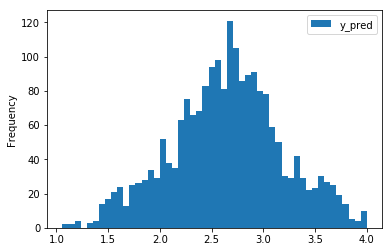

In [25]:
print(automation_scores.shape)

automation_scores[["DWA ID", "DWA Title", "y_pred"]].plot.hist(bins=50)